In [ ]:
!pip install -q -U langchain transformers bitsandbytes accelerate


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 90.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 81.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.1 MB/s eta 0:00:00


In [2]:
!pip install langchain_community
import torch
from transformers import BitsAndBytesConfig
from langchain import HuggingFacePipeline
from langchain import PromptTemplate, LLMChain
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 2.8 MB/s eta 0:00:00


In [3]:
quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_use_double_quant=True,
)

In [4]:
from huggingface_hub import login



In [5]:
model_4bit = AutoModelForCausalLM.from_pretrained( "mistralai/Mistral-7B-Instruct-v0.3", device_map="auto",quantization_config=quantization_config, )
tokenizer = AutoTokenizer.from_pretrained("mistralai/Mistral-7B-Instruct-v0.3")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/601 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.55G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/141k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/587k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

In [6]:
pipeline_inst = pipeline(
        "text-generation",
        model=model_4bit,
        tokenizer=tokenizer,
        use_cache=True,
        device_map="auto",
        max_length=8000,
        do_sample=True,
        top_k=5,
        num_return_sequences=1,
        eos_token_id=tokenizer.eos_token_id,
        pad_token_id=tokenizer.eos_token_id,
)

llm = HuggingFacePipeline(pipeline=pipeline_inst)

Device set to use cuda:0
<ipython-input-6-a9364308e373>:15: LangChainDeprecationWarning: The class `HuggingFacePipeline` was deprecated in LangChain 0.0.37 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFacePipeline``.
  llm = HuggingFacePipeline(pipeline=pipeline_inst)


In [7]:
knowledge_chunk = None
communication_unit = None
question = None
# worker_template = f"""<s>[INST] Here is the Current source Text:
# {knowledge_chunk}
# Here is the summary of the previous source text:
# {communication_unit}
# You need to read current source text and summary of previous source text (if any) and generate a
# summary to include them both. Later, this summary will be used for other agents to answer the
# Query, if any. So please write the summary that can include the evidence for answering the Query:
# {question} [/INST] </s>
# """

def generate_response(template):
  prompt = PromptTemplate(template=template, input_variables=["question","context"])
  llm_chain = LLMChain(prompt=prompt, llm=llm)
  response = llm_chain.run({})
  return response

In [ ]:
manager_template = f"""The following are given passages. However, the source text is too long and has been summarized. You
need to answer based on the summary:
{communication_unit}
Question: {question}
Answer:
"""

Question Tested:
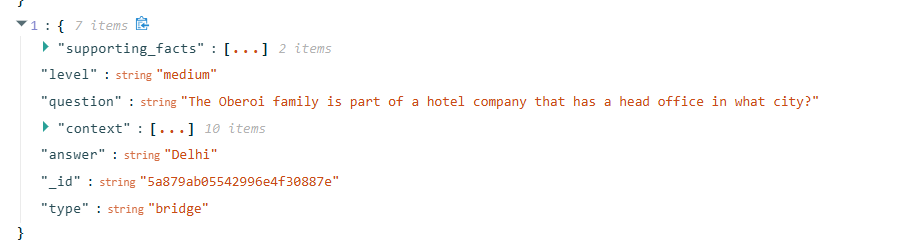

**Mistral 7B Answer**: The Oberoi family is part of a hotel company that has a head office in what city, the correct answer is Delhi, India.

**[Gemini Answer](https://)**: Delhi

In [42]:
# text = """Radio City (Indian radio station) Radio City is India's first private FM radio station and was started on 3 July 2001. It broadcasts on 91.1 (earlier 91.0 in most cities) megahertz from Mumbai (where it was started in 2004), Bengaluru (started first in 2001), Lucknow and New Delhi (since 2003). It plays Hindi, English and regional songs. It was launched in Hyderabad in March 2006, in Chennai on 7 July 2006 and in Visakhapatnam October 2007. Radio City recently forayed into New Media in May 2008 with the launch of a music portal - PlanetRadiocity.com that offers music related news, videos, songs, and other music-related features. The Radio station currently plays a mix of Hindi and Regional music. Abraham Thomas is the CEO of the company. History of Albanian football Football in Albania existed before the Albanian Football Federation (FSHF) was created. This was evidenced by the team's registration at the Balkan Cup tournament during 1929-1931, which started in 1929 (although Albania eventually had pressure from the teams because of competition, competition started first and was strong enough in the duels). Albanian National Team was founded on June 6, 1930, but Albania had to wait 16 years to play its first international match and then defeated Yugoslavia in 1946. In 1932, Albania joined FIFA (during the 12–16 June convention) And in 1954 she was one of the founding members of UEFA. Echosmith Echosmith is an American, Corporate indie pop band formed in February 2009 in Chino, California. Originally formed as a quartet of siblings, the band currently consists of Sydney, Noah and Graham Sierota, following the departure of eldest sibling Jamie in late 2016. Echosmith started first as 'Ready Set Go!' until they signed to Warner Bros. Records in May 2012. They are best known for their hit song 'Cool Kids', which reached number 13 on the 'Billboard' Hot 100 and was certified double platinum by the RIAA with over 1,200,000 sales in the United States and also double platinum by ARIA in Australia. The song was Warner Bros. Records' fifth-biggest-selling-digital song of 2014, with 1.3 million downloads sold. The band's debut album, 'Talking Dreams', was released on October 8, 2013. Women's colleges in the Southern United States Women's colleges in the Southern United States refers to undergraduate, bachelor's degree–granting institutions, often liberal arts colleges, whose student populations consist exclusively or almost exclusively of women, located in the Southern United States. Many started first as girls' seminaries or academies. Salem College is the oldest female educational institution in the South and Wesleyan College is the first that was established specifically as a college for women. Some schools, such as Mary Baldwin University and Salem College, offer coeducational courses at the graduate level. First Arthur County Courthouse and Jail The First Arthur County Courthouse and Jail, was perhaps the smallest court house in the United States, and serves now as a museum. Arthur's Magazine Arthur's Magazine (1844–1846) was an American literary periodical published in Philadelphia in the 19th century. Edited by T.S. Arthur, it featured work by Edgar A. Poe, J.H. Ingraham, Sarah Josepha Hale, Thomas G. Spear, and others. In May 1846 it was merged into 'Godey's Lady's Book'. 2014–15 Ukrainian Hockey Championship The 2014–15 Ukrainian Hockey Championship was the 23rd season of the Ukrainian Hockey Championship. Only four teams participated in the league this season, because of the instability in Ukraine and that most of the clubs had economical issues. Generals Kiev was the only team that participated in the league the previous season, and the season started first after the year-end of 2014. The regular season included just 12 rounds, where all the teams went to the semifinals. In the final, ATEK Kiev defeated the regular season winner HK Kremenchuk. First for Women First for Women is a woman's magazine published by Bauer Media Group in the USA. The magazine was started in 1989. It is based in Englewood Cliffs, New Jersey. In 2011 the circulation of the magazine was 1,310,696 copies. Freeway Complex Fire The Freeway Complex Fire was a 2008 wildfire in the Santa Ana Canyon area of Orange County, California. The fire started as two separate fires on November 15, 2008. The 'Freeway Fire' started first shortly after 9am with the 'Landfill Fire' igniting approximately 2 hours later. These two separate fires merged a day later and ultimately destroyed 314 residences in Anaheim Hills and Yorba Linda. William Rast William Rast is an American clothing line founded by Justin Timberlake and Trace Ayala. It is most known for their premium jeans. On October 17, 2006, Justin Timberlake and Trace Ayala put on their first fashion show to launch their new William Rast clothing line. The label also produces other clothing items such as jackets and tops. The company started first as a denim line, later evolving into a men’s and women’s clothing line."""
text = "Ritz-Carlton Jakarta The Ritz-Carlton Jakarta is a hotel and skyscraper in Jakarta, Indonesia and 14th Tallest building in Jakarta. It is located in city center of Jakarta, near Mega Kuningan, adjacent to the sister JW Marriott Hotel. It is operated by The Ritz-Carlton Hotel Company. The complex has two towers that comprises a hotel and the Airlangga Apartment respectively. The hotel was opened in 2005. Oberoi family The Oberoi family is an Indian family that is famous for its involvement in hotels, namely through The Oberoi Group. Ishqbaaaz Ishqbaaaz (English: 'Lovers') is an Indian drama television series which is broadcast on Star Plus. It premiered on 27 June 2016 and airs Mon-Fri 10-11pm IST. Nakuul Mehta, Kunal Jaisingh and Leenesh Mattoo respectively portray Shivaay, Omkara and Rudra, the three heirs of the Oberoi family. The show initially focused on the tale of three brothers, later become centered on the love story of Shivaay and Annika (Surbhi Chandna); with the story of Omkara and Rudra being shifted to the spinoff series 'Dil Boley Oberoi'. In July 2017 'Dil Boley Oberoi' ended and the storylines were merged back into 'Ishqbaaaz' which doubled its runtime. Hotel Tallcorn The Hotel Tallcorn is located in Marshalltown, Iowa. Today it is called the Tallcorn Towers Apartments. Built in 1928 by the Eppley Hotel Company, local citizens contributed $120,000 to ensure the successful completion of this seven-story hotel. It was completed in connection to the seventy-fifth anniversary of Marshalltown. The hotel's sale in 1956 from the Eppley chain to the Sheraton Corporation was part of the second largest hotel sale in United States history. The Tallcorn was listed as a contributing property in the Marshalltown Downtown Historic District on the National Register of Historic Places in 2002. Mohan Singh Oberoi Rai Bahadur Mohan Singh Oberoi (15 August 1898 – 3 May 2002) was an Indian hotelier, the founder and chairman of Oberoi Hotels & Resorts, India's second-largest hotel company, with 35 hotels in India, Sri Lanka, Nepal, Egypt, Australia and Hungary. Hotel Bond Hotel Bond is a historic hotel, built in two stages in 1913 and 1921, in downtown Hartford, Connecticut by hotelier Harry S. Bond. It is located near Bushnell Park, and was considered the grandest hotel in Hartford during its heyday. The second section is a 12 story building attached to the 6 story first section. A Statler Hotel opened in the area in 1954, creating competition, and the Bond Hotel company declared bankruptcy shortly after that. It was bought by the California-based Masaglia Hotel chain, which began an incremental renovation program. In 1964 it was sold to a Cincinnati, Ohio investment group which announced extensive renovation plans. However, the financing plans fell through and the hotel was again in bankruptcy. The building was sold at auction to the Roman Catholic Archdiocese of Hartford in 1965, and it became the home of the Saint Francis Hospital School of Nursing. The Bond Ballroom reopened in 2001, with the rest of the building becoming a Homewood Suites by Hilton in 2006. The Oberoi Group The Oberoi Group is a hotel company with its head office in Delhi. Founded in 1934, the company owns and/or operates 30+ luxury hotels and two river cruise ships in six countries, primarily under its Oberoi Hotels & Resorts and Trident Hotels brands. Future Fibre Technologies Future Fibre Technologies (FFT) is a fiber optic sensing technologies company based in Melbourne, Australia, with its US head office in Mountain View, California, Middle East head office in Dubai, Indian head office in New Delhi and European head office in London. Founded in 1994, Future Fibre Technologies product line provides optical fiber intrusion detection systems for perimeters, buried oil and gas pipelines and data communication networks. 289th Military Police Company The 289th Military Police Company was activated on 1 November 1994 and attached to Hotel Company, 3rd Infantry (The Old Guard), Fort Myer, Virginia. Hotel Company is the regiment's specialty company. Glennwanis Hotel The Glennwanis Hotel is a historic hotel in Glennville, Georgia, Tattnall County, Georgia, built on the site of the Hughes Hotel. The hotel is located at 209-215 East Barnard Street. The old Hughes Hotel was built out of Georgia pine circa 1905 and burned in 1920. The Glennwanis was built in brick in 1926. The local Kiwanis club led the effort to get the replacement hotel built, and organized a Glennville Hotel Company with directors being local business leaders. The wife of a local doctor won a naming contest with the name 'Glennwanis Hotel', a suggestion combining 'Glennville' and 'Kiwanis'."
knowledge_chunks = [text[i:i + 4000] for i in range(0, len(text), 4000)]

# question = "Which magazine was started first Arthur's Magazine or First for Women?"
question = "The Oberoi family is part of a hotel company that has a head office in what city?"
worker_template = f"""<s>[INST] Here is the Current source Text:
    {knowledge_chunks[0]}
    Here is the summary of the previous source text:
    {communication_unit}
    You need to read current source text and summary of previous source text (if any) and generate a
    summary to include them both. Later, this summary will be used for other agents to answer the
    Query, if any. So please write the summary that can include the evidence for answering the Query:
    {question} [/INST] Generate a summary of the current source(if any) and the previous source text regardless of whether or not you think the current source text answers the question. Summmary: </s>
    """
generate_response(worker_template).split("Summmary: </s>\n")[1]
for i, chunk in enumerate(knowledge_chunks):
    # knowledge_chunk = chunk

    worker_template = f"""<s>[INST] Here is the Current source Text:
    {chunk}
    Here is the summary of the previous source text:
    {communication_unit}
    You need to read current source text and summary of previous source text (if any) and generate a
    summary to include them both. Later, this summary will be used for other agents to answer the
    Query, if any. So please write the summary that can include the evidence for answering the Query:
    {question} [/INST] Generate a summary of the current source(if any) and the previous source text regardless of whether or not you think the current source text answers the question. Summmary: </s>
    """
    # print(worker_template)
    communication_unit = generate_response(worker_template).split("Summmary: </s>\n")[1]
    # print(communication_unit)
    if i == len(knowledge_chunks) - 1:
        manager_template = f"""The following are given passages. However, the source text is too long and has been summarized. You
        need to answer based on the summary:
        {communication_unit}
        Question: {question}
        Answer:a
        """
        print(generate_response(manager_template))



The following are given passages. However, the source text is too long and has been summarized. You
        need to answer based on the summary:
            1. The Oberoi family is associated with a hotel company headquartered in Delhi, India, which owns and/or operates luxury hotels and river cruise ships in six countries under the brands Oberoi Hotels & Resorts and Trident Hotels.
    2. The Glennwanis Hotel, a historic hotel located in Glennville, Georgia, was built in 1926 after the old Hughes Hotel burned down in 1920. The local Kiwanis club led the effort to have a replacement built and organized a Glennville Hotel Company with business leaders as directors. The wife of a local doctor won a naming contest, choosing the name 'Glennwanis Hotel' as a combination of 'Glennville' and 'Kiwanis'.
    3. The summary of the previous source text mentioned various unrelated topics, including Radio City, the first private FM radio station in India; the history of Albanian football; Echosmith

In [43]:


from google import genai
client = genai.Client(api_key=GEMINI_API_KEY)
# worker_template = f"""Here is the Current source Text:
#     {knowledge_chunks[0]}
#     Here is the summary of the previous source text:
#     {communication_unit}
#     You need to read current source text and summary of previous source text (if any) and generate a
#     summary to include them both. Later, this summary will be used for other agents to answer the
#     Query, if any. So please write the summary that can include the evidence for answering the Query:
#     {question} Generate a summary of the current source(if any) and the previous source text regardless of whether or not you think the current source text answers the question.
#     """

for i, chunk in enumerate(knowledge_chunks):
    # knowledge_chunk = chunk

    worker_template = f"""Here is the Current source Text:
    {chunk}
    Here is the summary of the previous source text:
    {communication_unit}
    You need to read current source text and summary of previous source text (if any) and generate a
    summary to include them both. Later, this summary will be used for other agents to answer the
    Query, if any. So please write the summary that can include the evidence for answering the Query:
    {question} Generate a summary of the current source(if any) and the previous source text regardless of whether or not you think the current source text answers the question. Summmary:
    """
    # print(worker_template)
    response = client.models.generate_content(
    model="gemini-2.0-flash", contents=worker_template)
    communication_unit = response.text
    # print(communication_unit)
    if i == len(knowledge_chunks) - 1:
        manager_template = f"""The following are given passages. However, the source text is too long and has been summarized. You
        need to answer based on the summary:
        {communication_unit}
        Question: {question}
        Answer:a
        """
        response = client.models.generate_content(
    model="gemini-2.0-flash", contents=manager_template
)
        print(response.text)



Delhi



In [41]:
knowledge_chunks[1]

"in the USA. The magazine was started in 1989. It is based in Englewood Cliffs, New Jersey. In 2011 the circulation of the magazine was 1,310,696 copies. Freeway Complex Fire The Freeway Complex Fire was a 2008 wildfire in the Santa Ana Canyon area of Orange County, California. The fire started as two separate fires on November 15, 2008. The 'Freeway Fire' started first shortly after 9am with the 'Landfill Fire' igniting approximately 2 hours later. These two separate fires merged a day later and ultimately destroyed 314 residences in Anaheim Hills and Yorba Linda. William Rast William Rast is an American clothing line founded by Justin Timberlake and Trace Ayala. It is most known for their premium jeans. On October 17, 2006, Justin Timberlake and Trace Ayala put on their first fashion show to launch their new William Rast clothing line. The label also produces other clothing items such as jackets and tops. The company started first as a denim line, later evolving into a men’s and wome